In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from math import sqrt

In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df = pd.read_csv(ratings_url)
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


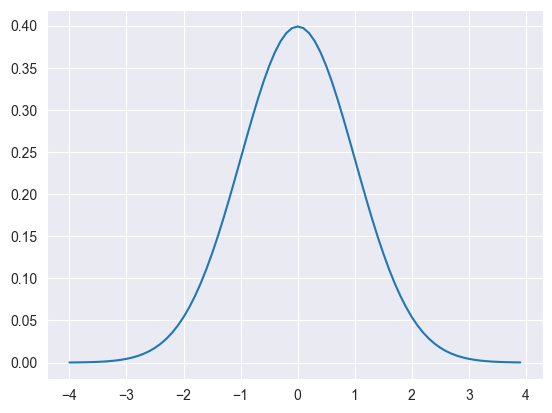

In [4]:
from scipy.stats import norm

# Plot between -4 and 4 with 0.1 steps.
x_axis = np.arange(-4, 4, 0.1)
# Mean = 0, SD = 1.
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

Using the teacher's rating dataset, what is the probability of receiving an evaluation score of greater than 4.5?

In [11]:
mean_eval = ratings_df['eval'].mean()
std_eval = ratings_df['eval'].std()
mean_eval, std_eval

(3.9982721362721585, 0.5548655704870065)

In [13]:
# P(X>=4.5)
1 - scipy.stats.norm.cdf((4.5 - mean_eval)/std_eval)

0.18293588278210926

Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2?

In [15]:
prob_3 = scipy.stats.norm.cdf((3.5 - mean_eval)/std_eval)
prob_4 = scipy.stats.norm.cdf((4.2 - mean_eval) / std_eval)

(prob_4 - prob_3) * 100

45.73159264502176

Using the two-tailed test from a normal distribution
* A professional basketball team wants to compare its performance with that of players in a regional league
* The pros are known to have a historic mean of 12 points per game with a standard deviation of 5.5
* A group of 36 regional playerd recorded on average 10.7 points per game
* The pro coach would like to know whether his professional team scores on average are different from that of the regional players

H0: The mean point of the regional players is not different from the historic mean
H1: The mean point of the regional players is different from the historic mean


In [18]:
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/sqrt(36))), 3)

"""
Obs: Because the p-value is greather than 0.05, we fail to reject the null hypothesis as there is no significant evidence that supports that the mean point of the regional players is different from the historic mean.
"""

0.156

Using the teachers'rating dataset, what is the probability of receiving an evaluation score greater than 3.3?

In [19]:
1 - scipy.stats.norm.cdf((3.3 - mean_eval)/std_eval)

0.8958859783111208

Using the teachers rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

In [25]:
prob_2 = scipy.stats.norm.cdf((2 - mean_eval) / std_eval)
prob_3 = scipy.stats.norm.cdf((3 - mean_eval) / std_eval)

prob_3 - prob_2 * 100

0.020171826578255846

To test the hypothesis that sleeping for at least 8h makes one smarter, 12 people who have slept for at least 8h every day for the past one year have their IQ tested
* Here are the results: 116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92
* Test using the following hypotheses: H0: μ = 100 or Ha: μ > 100

In [28]:
quiz_list = [116, 111, 101, 120, 99, 94, 106, 115, 107, 101, 110, 92]
variance = 8.45 ** 2
np.mean(quiz_list), np.std(quiz_list), variance

(106.0, 8.455767262643882, 71.40249999999999)

In [29]:
1 - scipy.stats.norm.cdf(106 - 100)/(8.45 - sqrt(12))

0.7994343402485846

In [5]:
# Normal Distribution:
# 1. Bell-shaped density curve described by its mean u and standard deviation
# 2. Curve is symmetrical and centered around the mean

In [6]:
# Z-test or a t-test: under what circumstances should one perform z_test or a t-test?
# Well, if one is aware of the populations standard deviation or variance, we use the z-test.
# And that is when we are comparing the sample mean to a hypothetical or a population mean.
# And if the population standard deviation is not known, and we are comparing the sample mean against the population mean within unknown standard deviation, then we use the t-test.

# 1st scenario: where we compare a sample mean to a population mean, the pop.std is known - z_test
# 2nd scenario: we compare a sample mean to a population mean, and the std is unknown - t-test
# 3rd scenario: comparing the means of two independent samples with equal variances, we use a t-test

In [7]:
# t- test: average values between two groups. e.g., you could be comparing whether teaching evaluations of male instructors is the same for female instructors. you can assume that the variance or std is equal or unequal.
# How do we determine this? We calculate the average teaching evaluation for female instructor to be 3.9, with a standard deviation of 0.53
# The average teaching evaluations for male instructors was calculated as 4.06 with standard deviation of 0.55
# When we conduct a t-test, we are faced with whether to assume equal or unequal variances.
# We have a t-test called Levene's test to determine the equality of variances.
# H0 = population variances are equal if the p-value of the test is less 0.05. reject the null hypothesis of equal variances and assume that the variances are unequal.


In [8]:
# ANOVA - one way analysis of variance is used to compare means of more than two groups using the F-distribution
# "samples in all groups are drawn from populations with the same mean values"
# "we fail to reject the null if the p-value of the f-test > 0.05 and infer equal means".

# cross tab - categorical versus categorical
# chi-squared

# scatterplot / pearson test for numerical
